In [2]:
from google.colab import files
uploaded_files = files.upload()

Saving internship_dataset_clean.csv to internship_dataset_clean.csv


Intern_ID             0
Attendance_Rate       0
Average_Task_Score    0
Behavior_Score        0
Dropout               0
dtype: int64


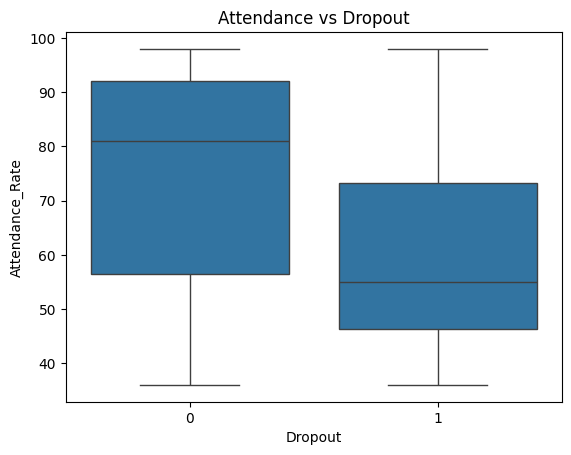

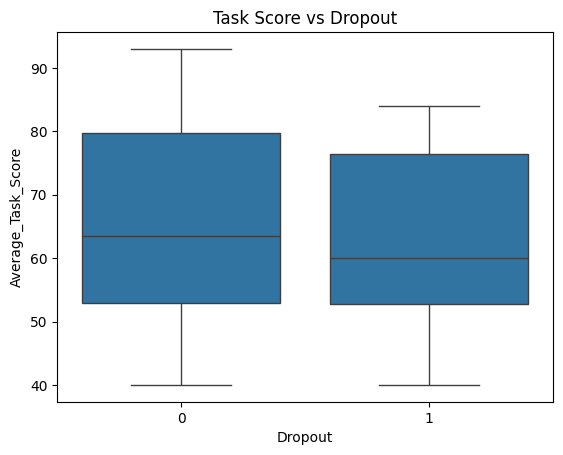

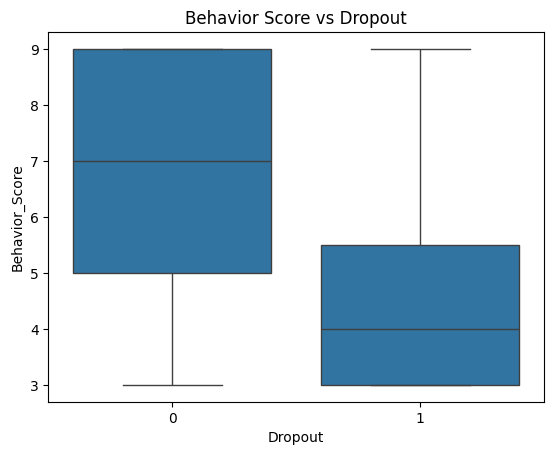

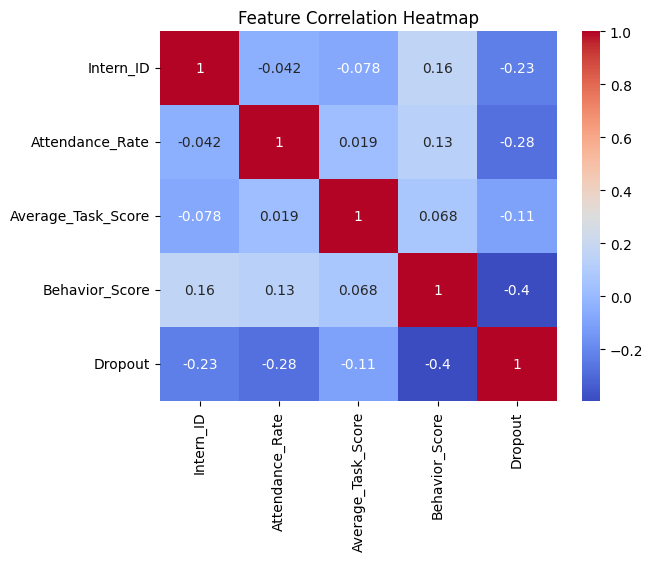

Accuracy: 0.5333333333333333

Confusion Matrix:
 [[6 4]
 [3 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.33      0.40      0.36         5

    accuracy                           0.53        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.56      0.53      0.54        15



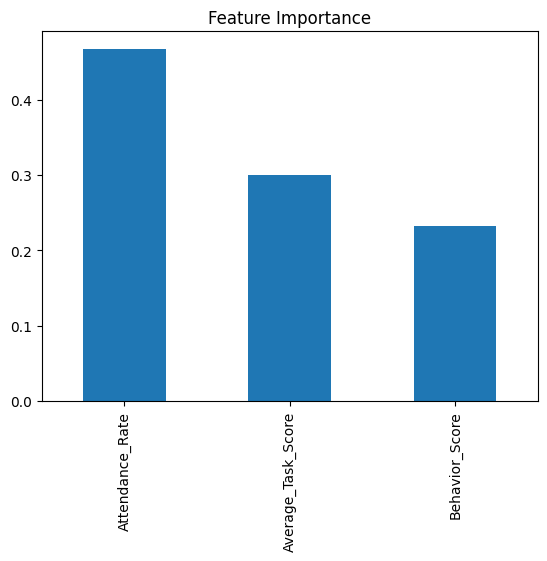

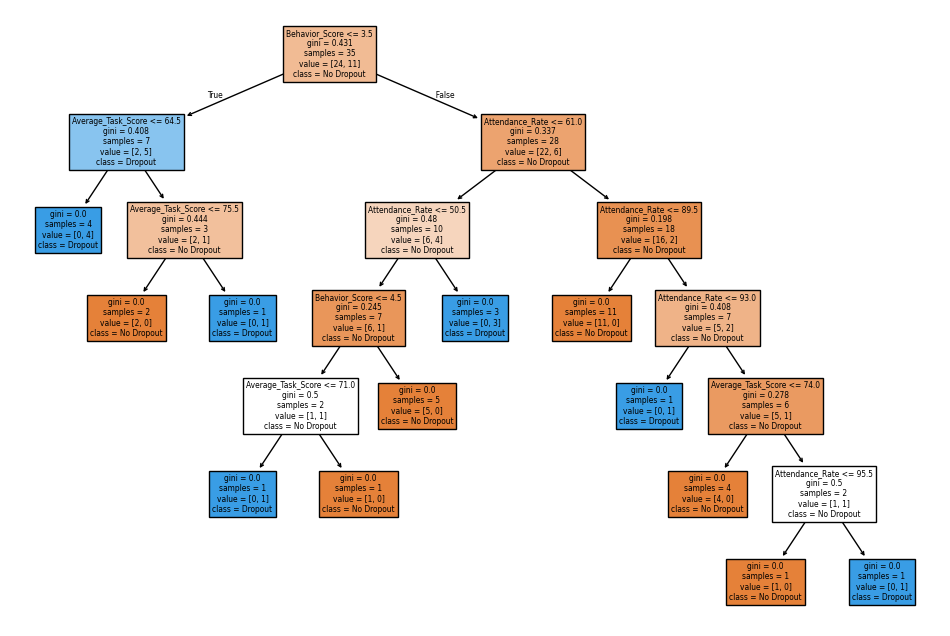

In [3]:
# Internship Performance Analysis and Dropout Prediction

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load Dataset
df = pd.read_csv('/content/internship_dataset_clean.csv')

# 3. Data Cleaning & Preprocessing
# Check for missing values
print(df.isnull().sum())

# If Dropout is Yes/No, encode it to 1/0 (if not already done)
df['Dropout'] = df['Dropout'].replace({'Yes':1, 'No':0})

# Ensure all feature columns are numeric
df['Attendance_Rate'] = pd.to_numeric(df['Attendance_Rate'], errors='coerce')
df['Average_Task_Score'] = pd.to_numeric(df['Average_Task_Score'], errors='coerce')
df['Behavior_Score'] = pd.to_numeric(df['Behavior_Score'], errors='coerce')

# Drop rows with missing data
df.dropna(inplace=True)

# 4. Data Visualization
# Attendance vs Dropout
sns.boxplot(x='Dropout', y='Attendance_Rate', data=df)
plt.title('Attendance vs Dropout')
plt.show()

# Task Score vs Dropout
sns.boxplot(x='Dropout', y='Average_Task_Score', data=df)
plt.title('Task Score vs Dropout')
plt.show()

# Behavior Score vs Dropout
sns.boxplot(x='Dropout', y='Behavior_Score', data=df)
plt.title('Behavior Score vs Dropout')
plt.show()

# Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 5. Model Training
# Define Features and Target
X = df[['Attendance_Rate', 'Average_Task_Score', 'Behavior_Score']]
y = df['Dropout']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# 8. Visualize Decision Tree
plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['No Dropout','Dropout'], filled=True)
plt.show()
